In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from datetime import datetime

from matplotlib.lines import Line2D

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [22]:
tracker = pickle.load(open(f'tweets/tweets_tracker.txt', 'rb'))
tracker

{'california': {'max_id': 1241540334410137603,
  'downloaded': 429513,
  'tweetLocation': '36.116,-119.682,300mi'},
 'colorado': {'max_id': 1241537123749990400,
  'downloaded': 41088,
  'tweetLocation': '39.060,-105.311,200mi'},
 'florida': {'max_id': 1241548946062880768,
  'downloaded': 148567,
  'tweetLocation': '27.766,-81.687,225mi'},
 'georgia': {'max_id': 1241551890954977281,
  'downloaded': 137930,
  'tweetLocation': '32.781,-83.334,150mi'},
 'idaho': {'max_id': 1241513089557618688,
  'downloaded': 9493,
  'tweetLocation': '44.241,-114.479,200mi'},
 'illinois': {'max_id': 1241557440681910273,
  'downloaded': 190732,
  'tweetLocation': '40.350,-88.986,150mi'},
 'louisiana': {'max_id': 1241554798308216832,
  'downloaded': 73430,
  'tweetLocation': '31.170,-91.868,150mi'},
 'massachusetts': {'max_id': 1241559391960289280,
  'downloaded': 136352,
  'tweetLocation': '42.230,-71.530,100mi'},
 'newyork': {'max_id': 1241567743842947074,
  'downloaded': 430184,
  'tweetLocation': '40.700

In [19]:
df = pd.read_csv(f'tweets/tweets_processed/coronavirus_california_tweets_processed', engine = 'python')

In [27]:
df.head

,id_str,created_at,full_text,possibly_sensitive,display_text_range,favorite_count,retweet_count,character_count,hashtags_count,symbols_count,urls_count,user_mentions_count,processed_text,sentiment_distribution,sentiment
0,1241541889544708096,2020-03-22 01:47:07+00:00,Good Evening everyone! Tomorrow at 7:00 A.M. P...,NaN,"[0, 269]",0,0,269,0,0,0,0,good evening everyone tomorrow pacific standar...,"{'neg': 0.049, 'neu': 0.845, 'pos': 0.106, 'co...",0.5229


In [29]:
df['date'] = df['created_at'].apply(lambda x: datetime.strptime(x[:10], '%Y-%m-%d'))

In [37]:
dates = df.groupby(['date'])['sentiment'].mean().keys().tolist()
average_sentiment = df.groupby(['date'])['sentiment'].mean().tolist()

In [223]:
dates

[Timestamp('2020-03-09 00:00:00'),
 Timestamp('2020-03-10 00:00:00'),
 Timestamp('2020-03-11 00:00:00'),
 Timestamp('2020-03-12 00:00:00'),
 Timestamp('2020-03-13 00:00:00'),
 Timestamp('2020-03-14 00:00:00'),
 Timestamp('2020-03-15 00:00:00'),
 Timestamp('2020-03-16 00:00:00'),
 Timestamp('2020-03-17 00:00:00'),
 Timestamp('2020-03-18 00:00:00'),
 Timestamp('2020-03-19 00:00:00'),
 Timestamp('2020-03-20 00:00:00'),
 Timestamp('2020-03-21 00:00:00'),
 Timestamp('2020-03-22 00:00:00')]

In [68]:
cases_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20'],
      dtype='object')

In [44]:
cases_df = pd.read_csv(f'tweets/time_series_19-covid-Confirmed.txt', engine = 'python')

In [77]:
state_cases = cases_df[cases_df['Province/State'] == 'California']
state_cases = state_cases.iloc[:,-len(dates):].transpose()
state_cases.columns = ['california']

In [81]:
state_cases = state_cases['california'].tolist()

* positive sentiment: compound score >= 0.05
* neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
* negative sentiment: compound score <= -0.05

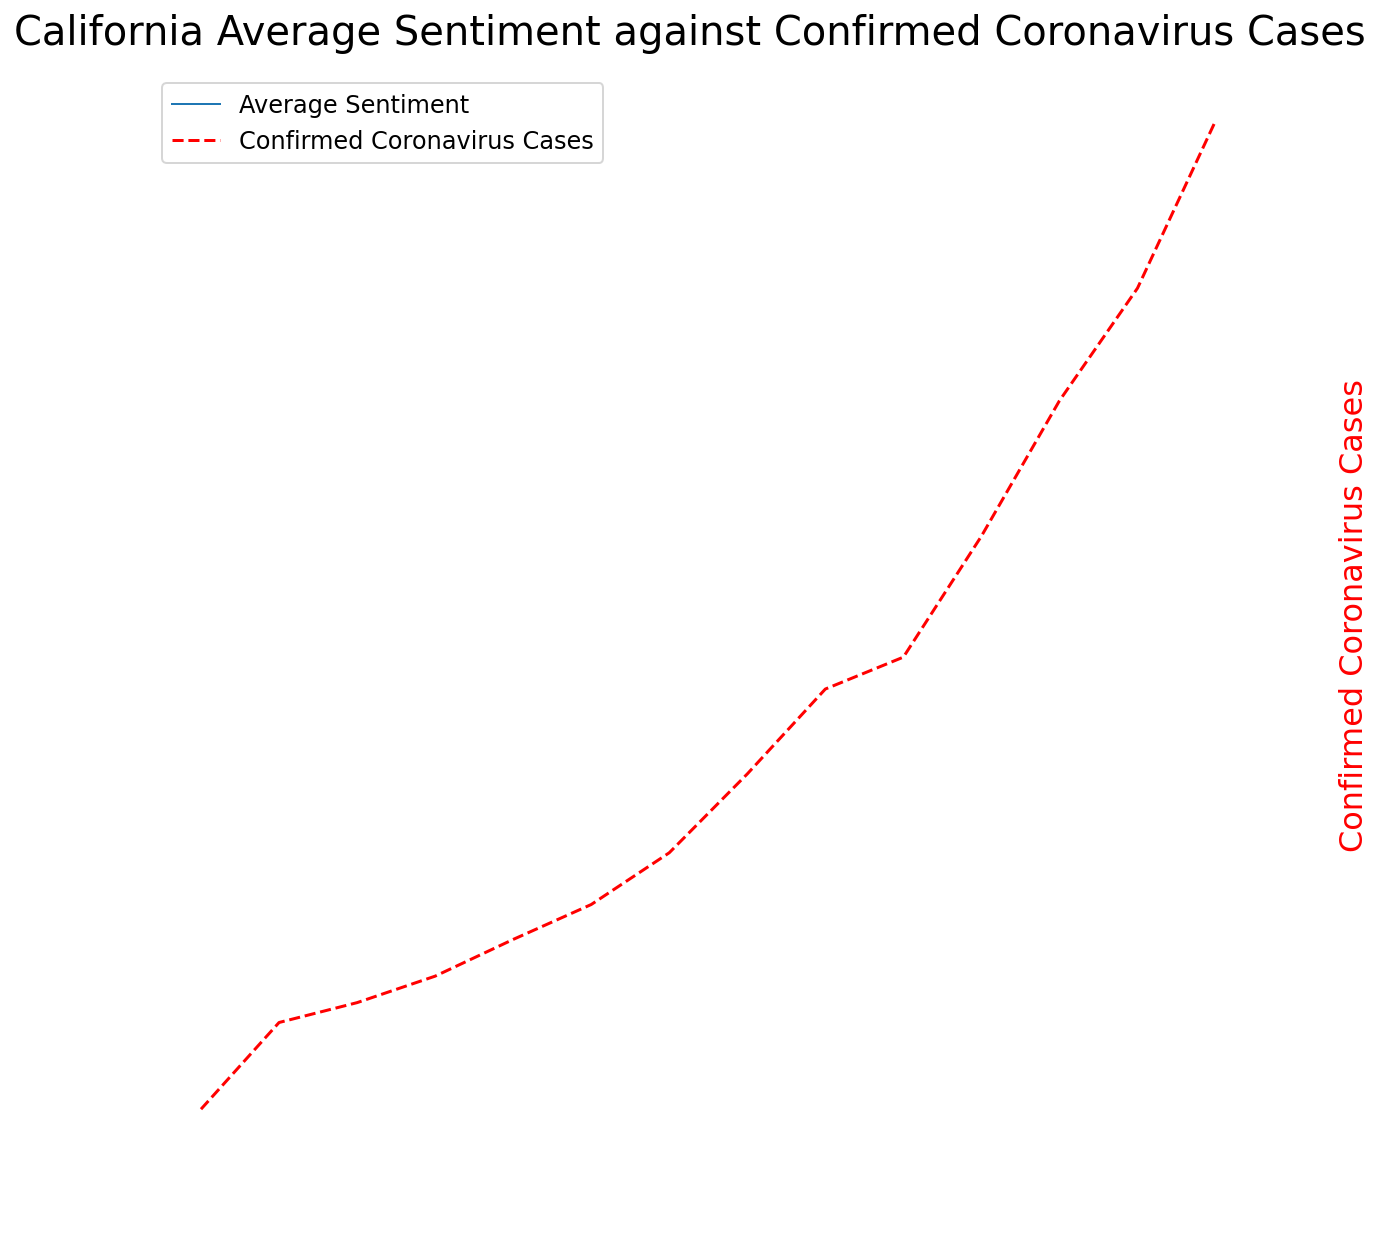

In [220]:
with plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', 'ytick.color':'white', 'figure.facecolor':'white'}):
    fig = plt.figure(figsize=(10,10))
    fig.suptitle(f'California Average Sentiment against Confirmed Coronavirus Cases', fontsize=20, y=0.92)
    ax1 = fig.add_subplot(111)
    ax1.plot(dates, average_sentiment, color='w')
    ax1.set_ylabel('Average Sentiment Over Time', fontsize=16, color='w')
    ax1.set_xlabel('Date', fontsize=16, color='w')


    ax2 = ax1.twinx()
    ax2.plot(dates, state_cases, 'r-', linestyle='dashed')
    ax2.set_ylabel('Confirmed Coronavirus Cases', color='r', fontsize=16)
    for t1 in ax2.get_yticklabels():
        t1.set_color('w')

#     from matplotlib.lines import Line2D

#     ax1_line = Line2D([0], [0], lw=1, label='Average Sentiment')
#     ax2_line = Line2D([0], [0], color='r', lw=1.5, ls='--', label='Confirmed Coronavirus Cases')
#     plt.legend(handles=[ax1_line, ax2_line], fontsize=12, fancybox=True)

    plt.savefig('tweets/images/california_sentiment_vs_cases.png')

In [221]:
cases_df = pd.read_csv(f'tweets/time_series_19-covid-Confirmed.txt', engine = 'python')
cases_df['Province/State'] = cases_df['Province/State'].apply(lambda x:  x.replace(' ','') if type(x) == str else False)
cases_df['Province/State'] = cases_df['Province/State'].apply(lambda x:  x.lower() if type(x) == str else False)

def graphSentimentVsCases(state):
    df = pd.read_csv(f'tweets/tweets_processed/coronavirus_{state}_tweets_processed', engine = 'python')
    df = df[df['created_at'] != '0.0'] # if a created_at timestamp is not properly done, twitter has 0.0 filled in
    df['date'] = df['created_at'].apply(lambda x: datetime.strptime(x[:10], '%Y-%m-%d') if type(x) == str else '0.0')
    df = df[df['date'] != '0.0'] # if a created_at timestamp is not properly done, twitter has 0.0 filled in
    dates = df.groupby(['date'])['sentiment'].mean().keys().tolist()
    average_sentiment = df.groupby(['date'])['sentiment'].mean().tolist()

    state_cases = cases_df[cases_df['Province/State'] == state]
    state_cases = state_cases.iloc[:,-len(dates):].transpose()
    state_cases.columns = [state]
    state_cases = state_cases[state].tolist()
    
    with plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', 'ytick.color':'white', 'figure.facecolor':'white'}):
        fig = plt.figure(figsize=(10,10))
        fig.suptitle(f'{state.capitalize()} Average Sentiment against Confirmed Coronavirus Cases', fontsize=20, y=0.92, color='w')
        ax1 = fig.add_subplot(111)
        ax1.plot(dates, average_sentiment, color='w')
        ax1.set_ylabel('Average Sentiment Over Time', fontsize=16, color='w')
        ax1.set_xlabel('Date', fontsize=16, color='w')

        ax2 = ax1.twinx()
        ax2.plot(dates, state_cases, 'r-', linestyle='dashed')
        ax2.set_ylabel('Confirmed Coronavirus Cases', color='r', fontsize=16)
        for t1 in ax2.get_yticklabels():
            t1.set_color('r')

#         ax1_line = Line2D([0], [0], lw=1, label='Average Sentiment')
#         ax2_line = Line2D([0], [0], color='r', lw=1.5, ls='--', label='Confirmed Coronavirus Cases')
#         plt.legend(handles=[ax1_line, ax2_line], fontsize=12, fancybox=True)
    
        plt.savefig(f'tweets/images/{state}_sentiment_vs_cases.png', transparent=True, bbox_inches='tight')
    print(f'Saved graph for {state}!')

Saved graph for california!
Saved graph for colorado!
Saved graph for florida!
Saved graph for georgia!
Saved graph for idaho!
Saved graph for illinois!
Saved graph for louisiana!
Saved graph for massachusetts!
Saved graph for newyork!
Saved graph for tennessee!
Saved graph for texas!
Saved graph for washington!


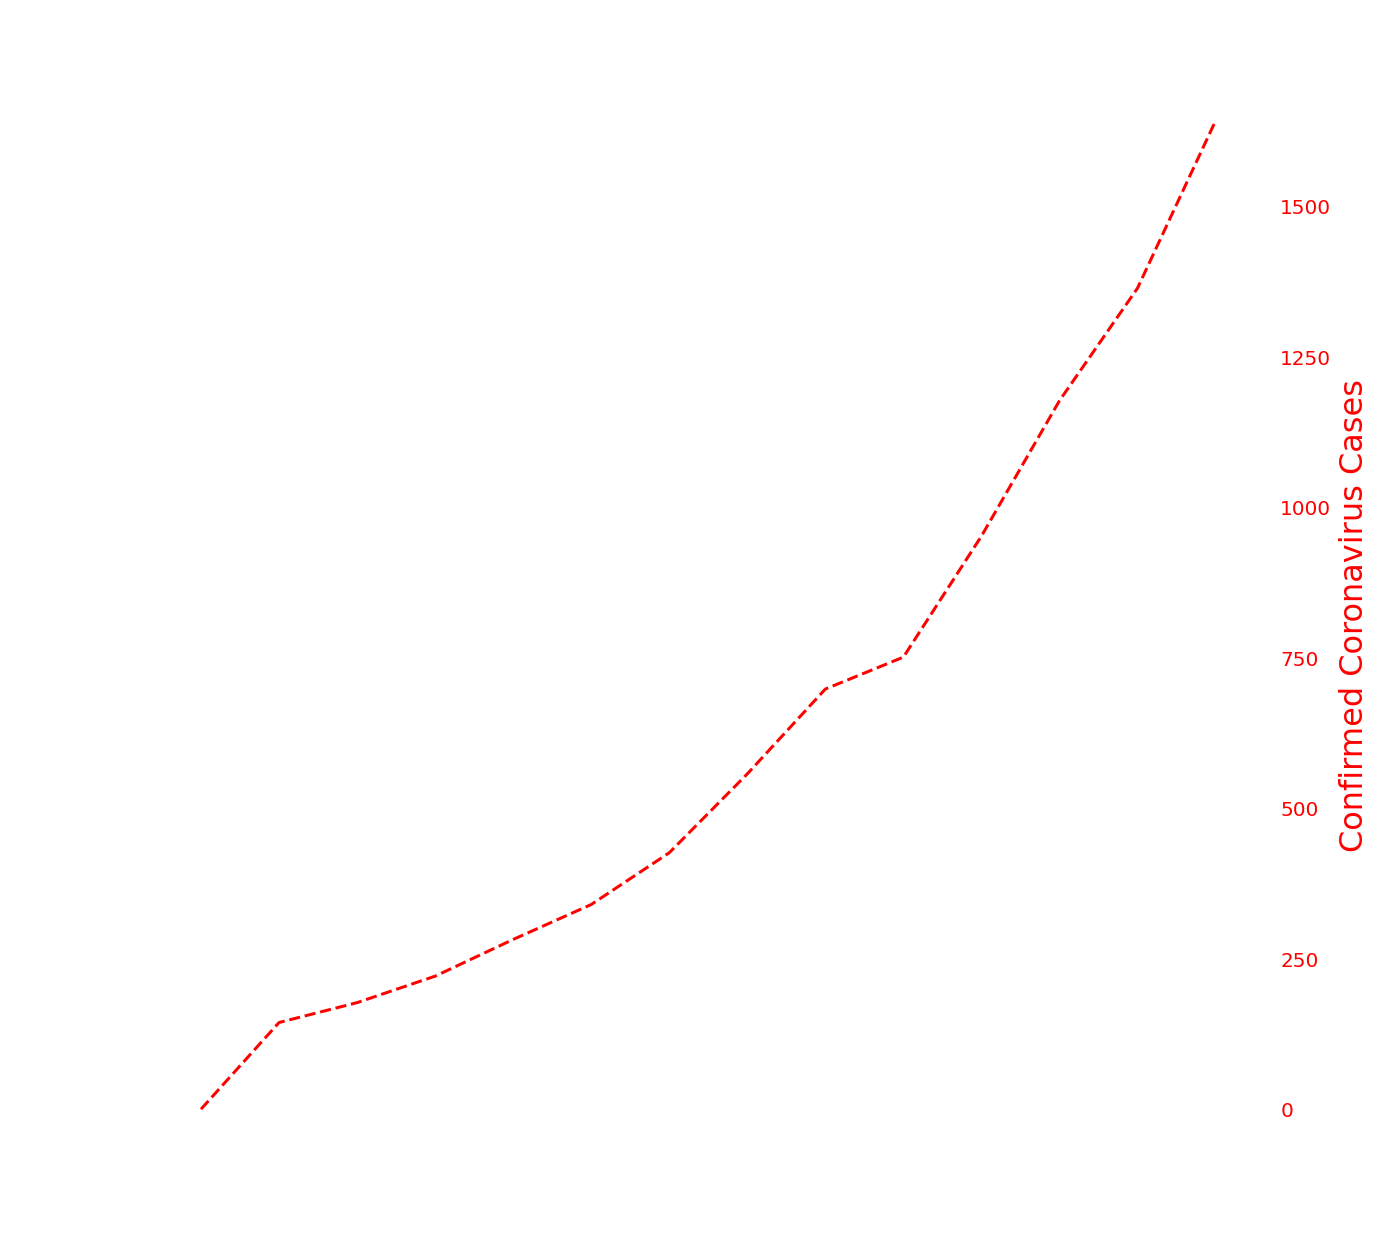

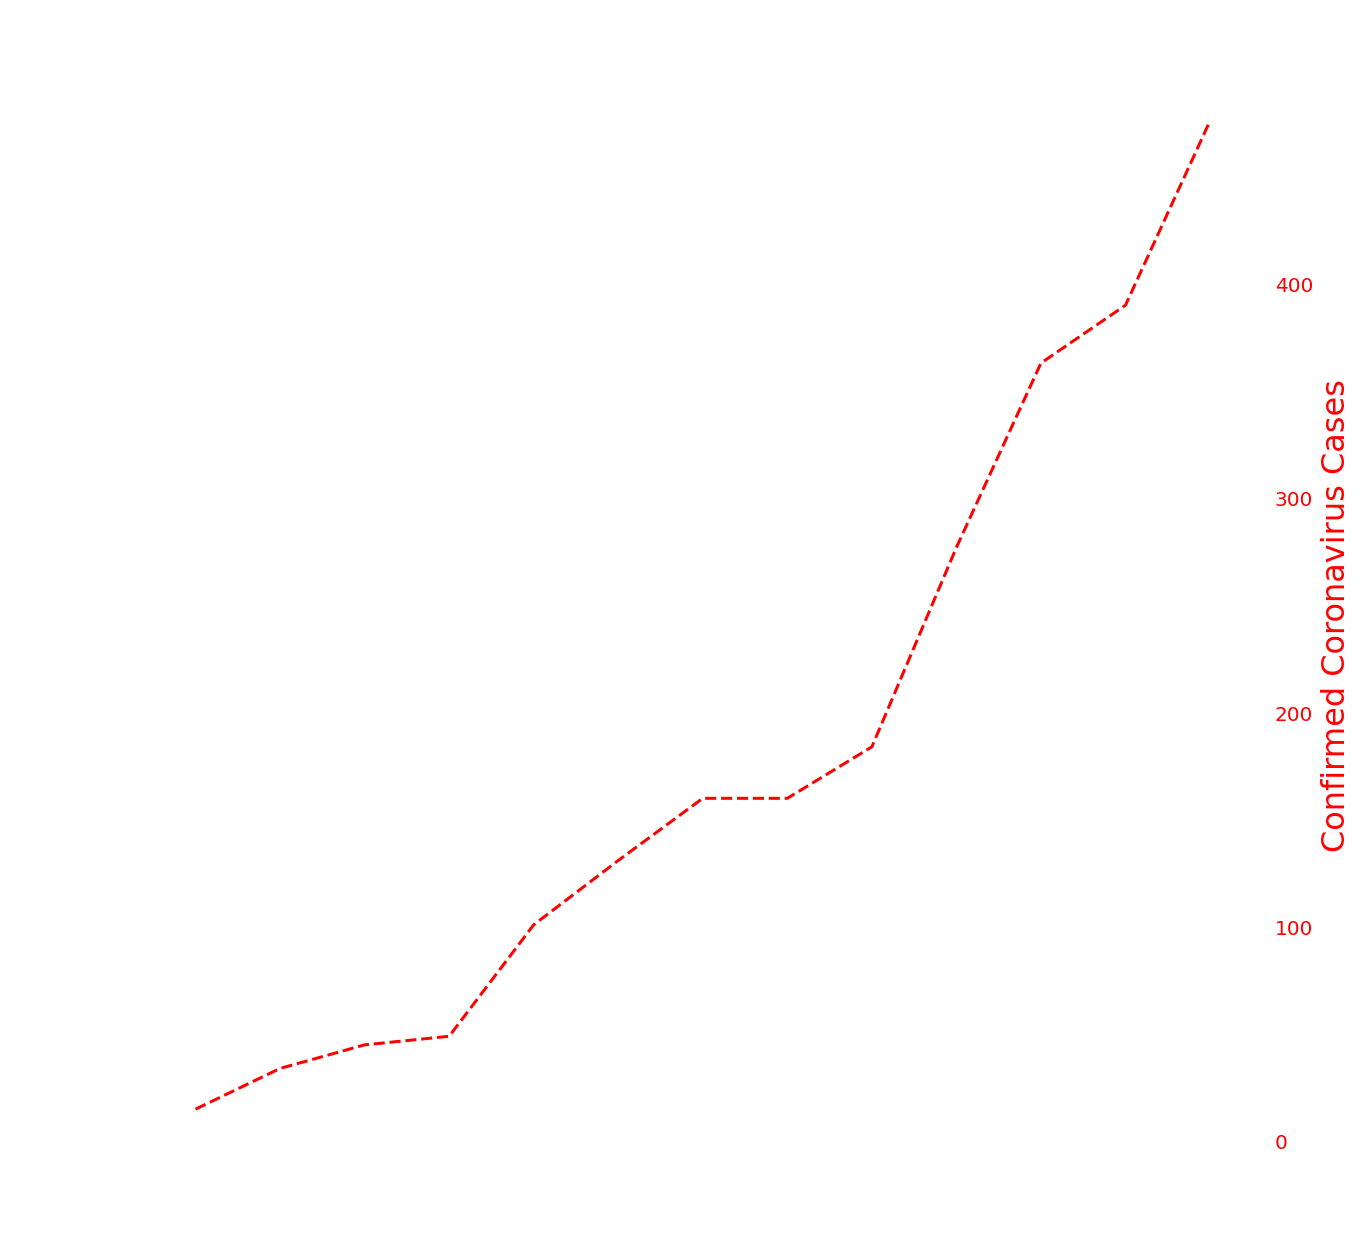

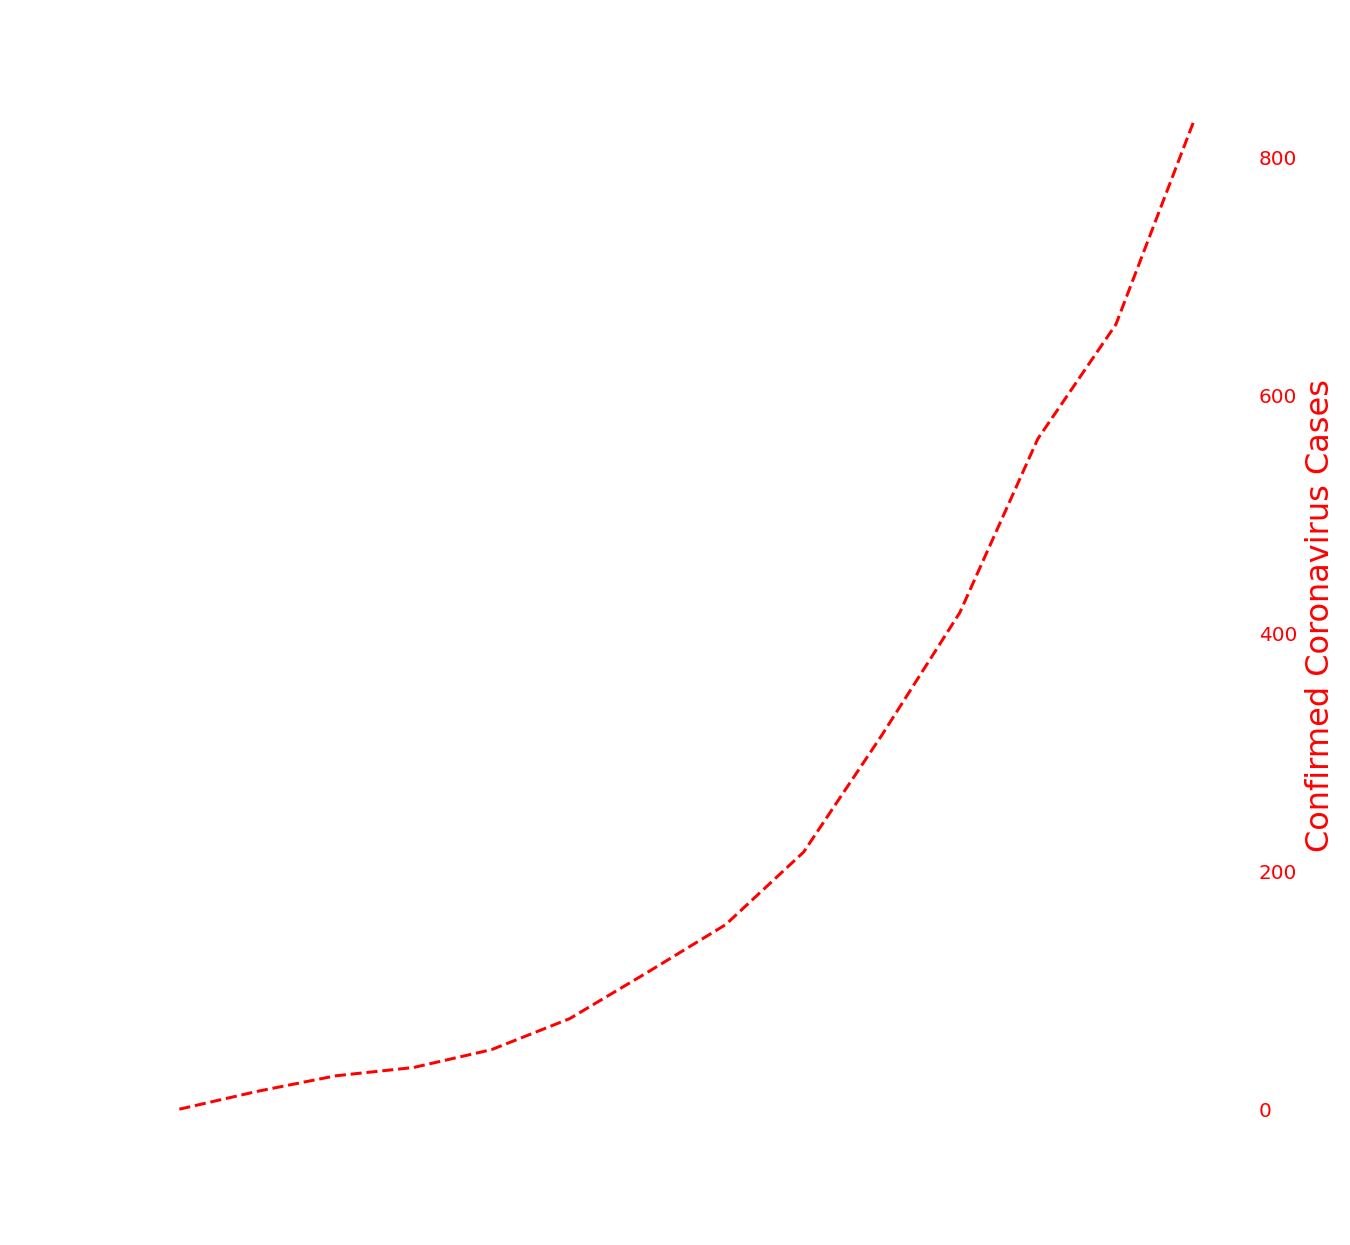

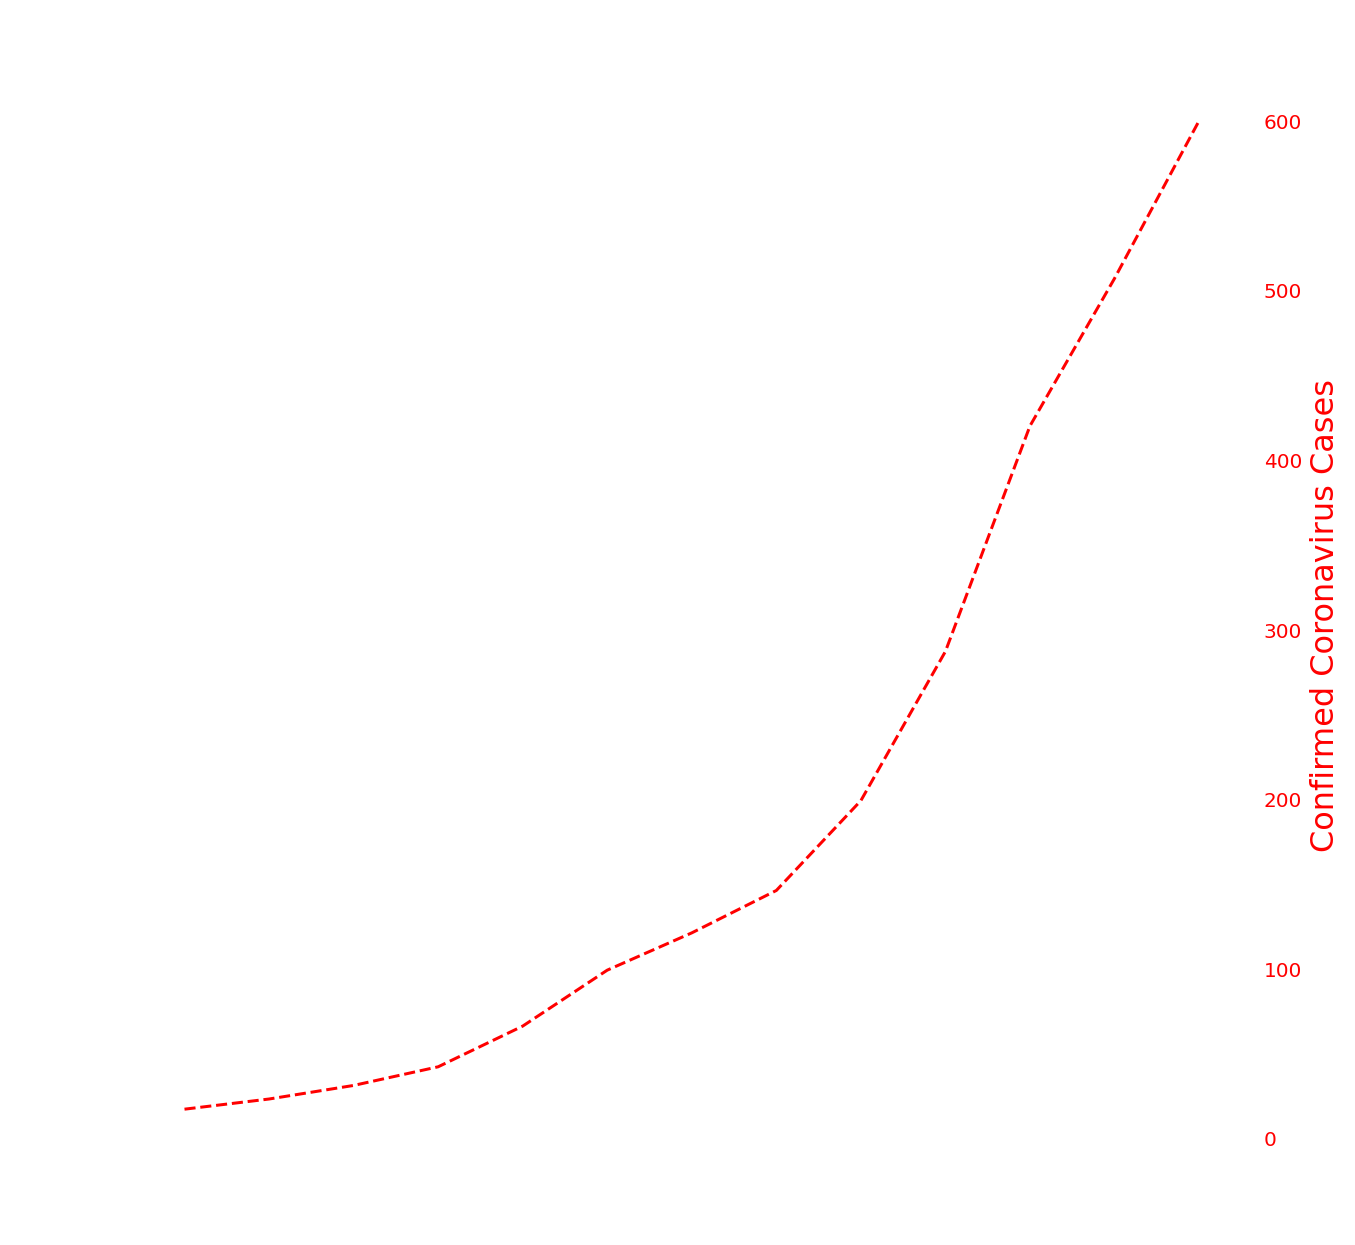

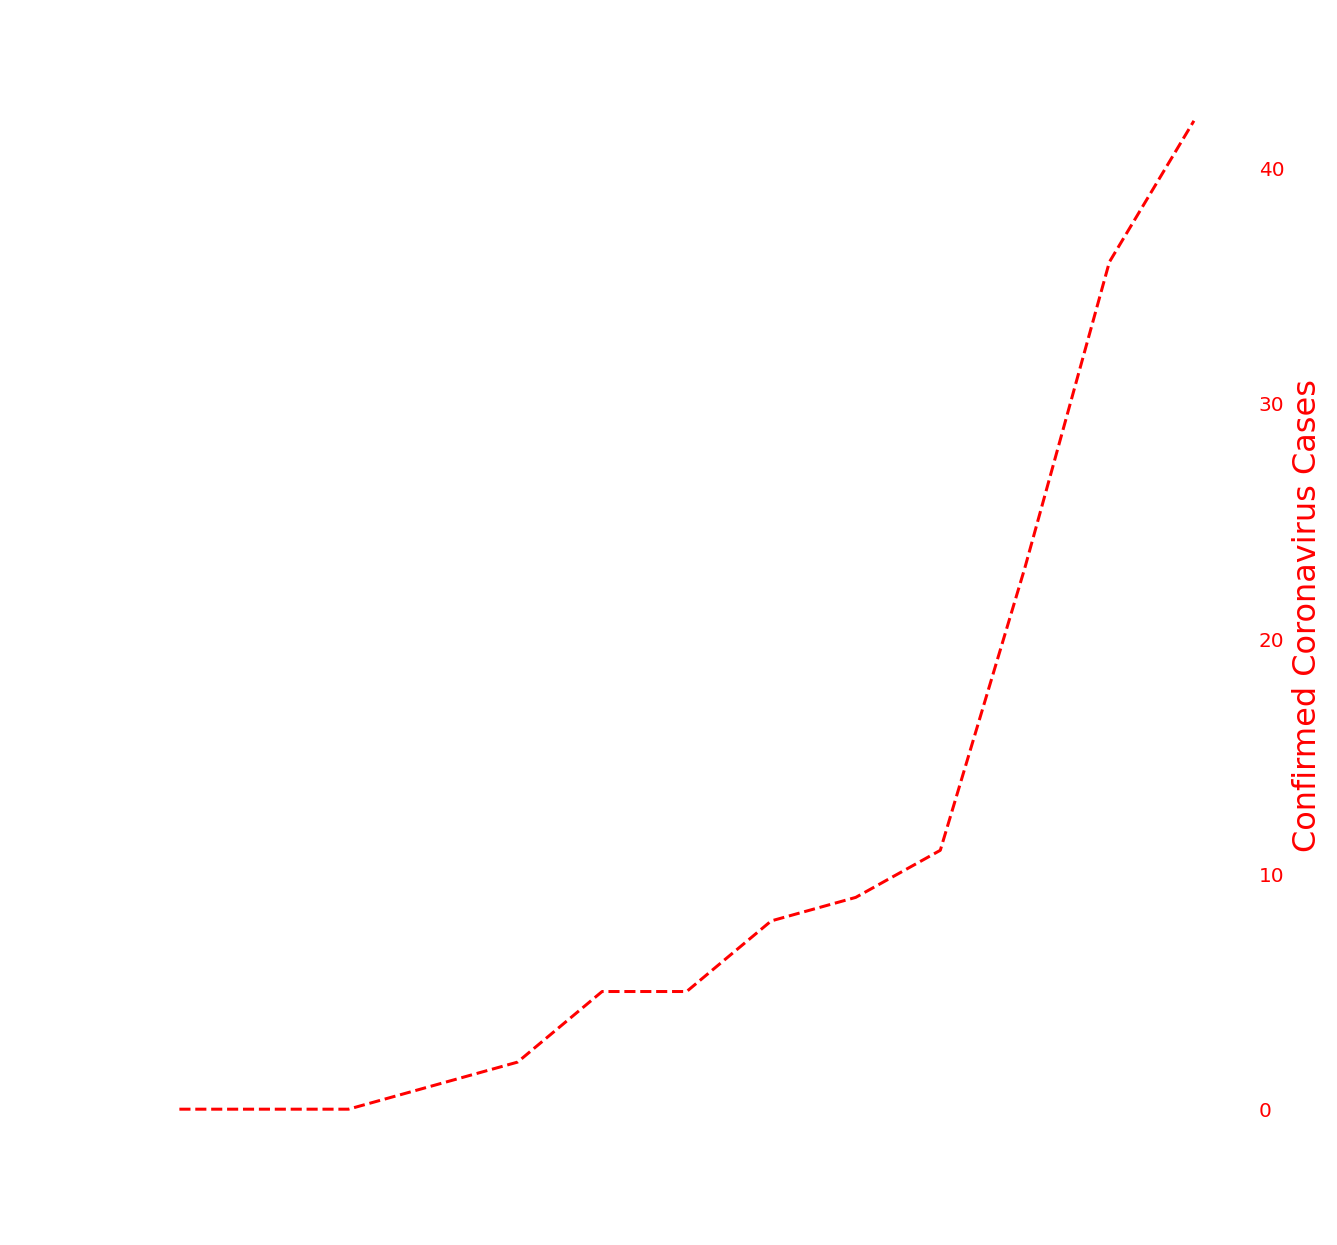

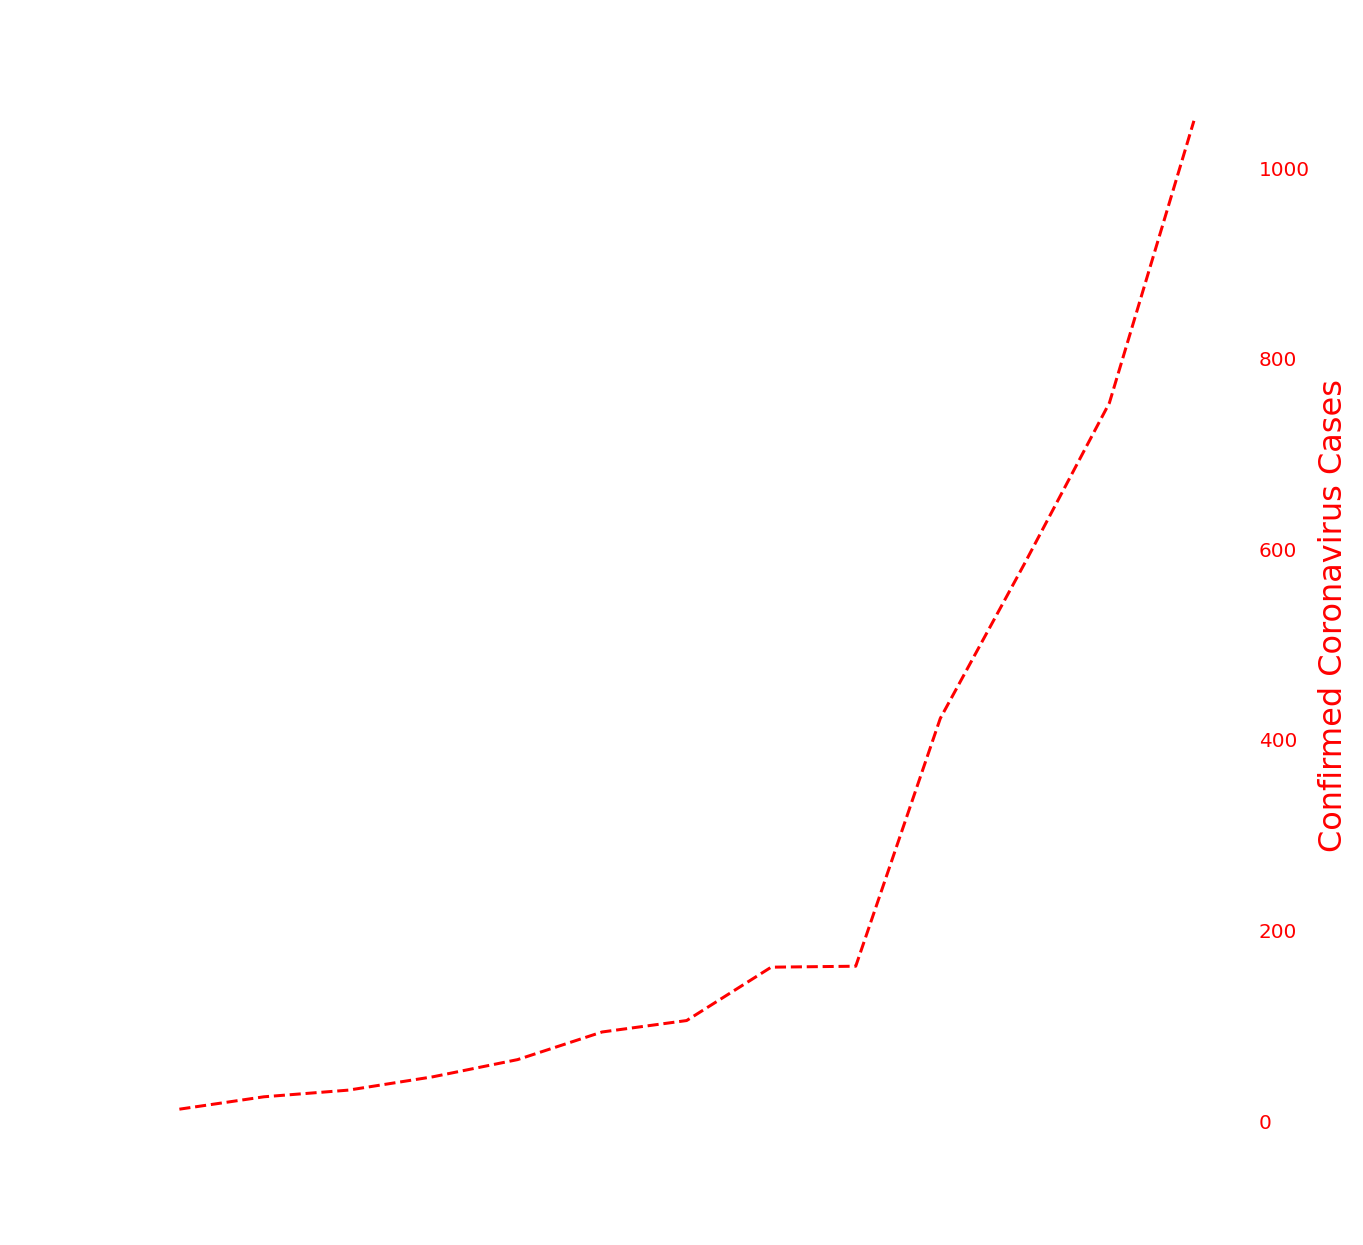

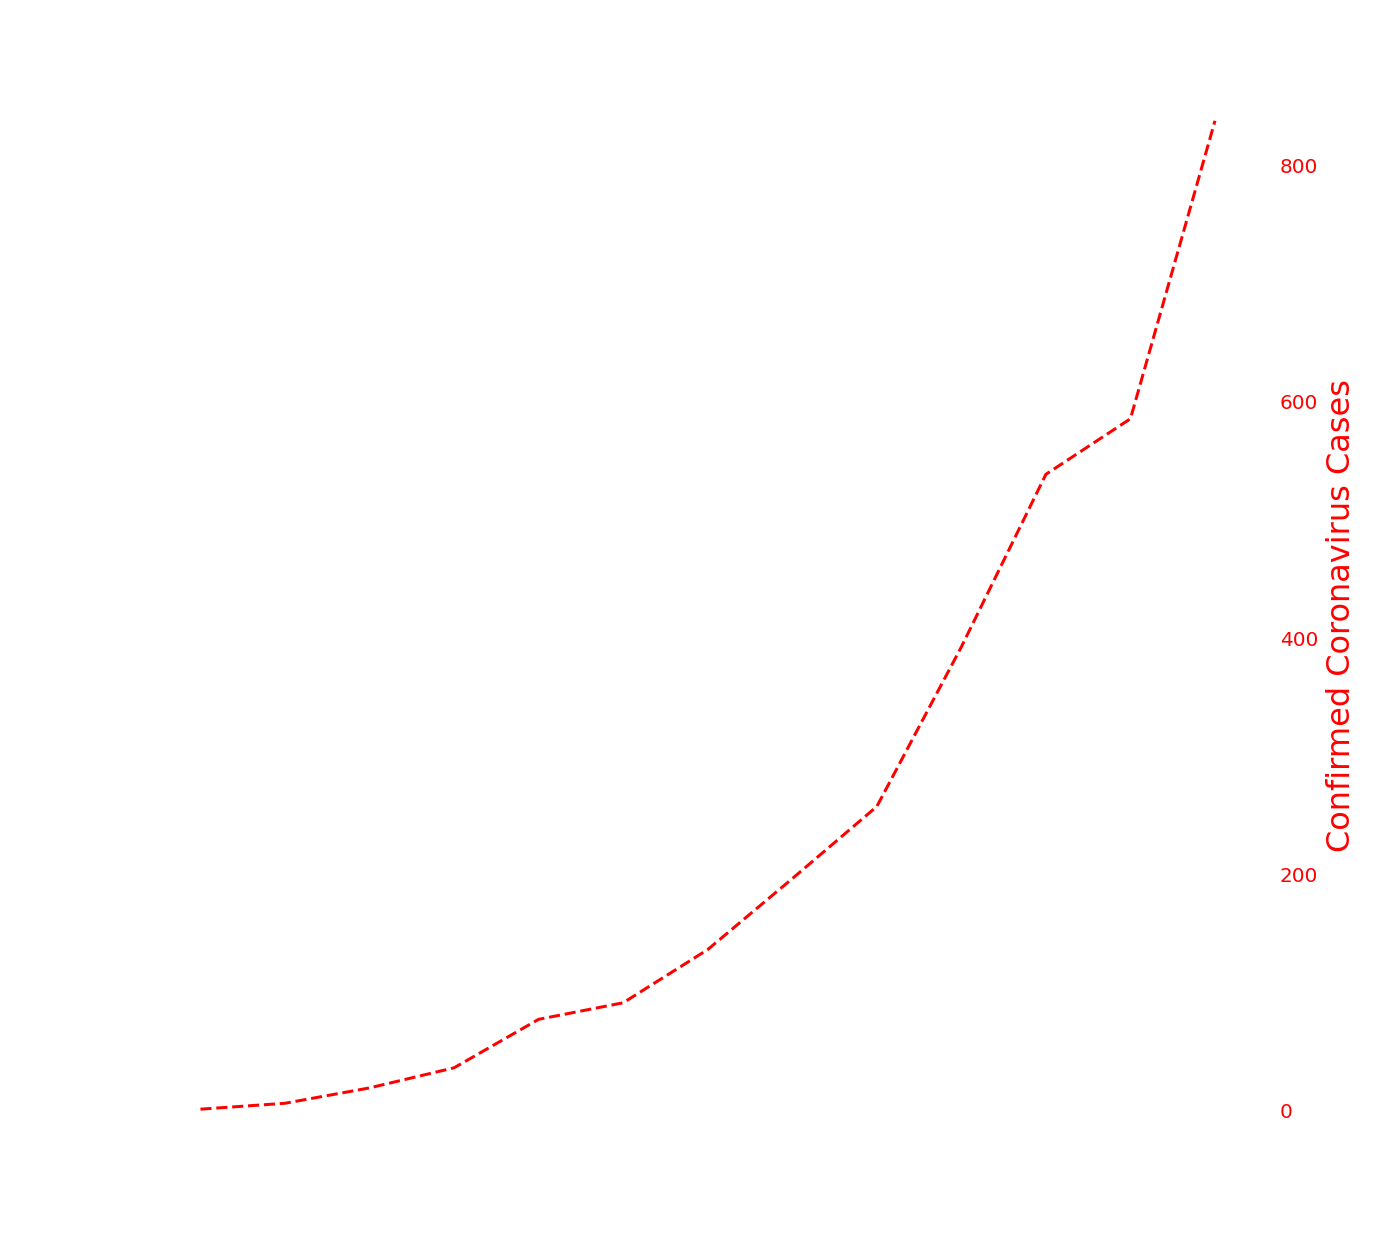

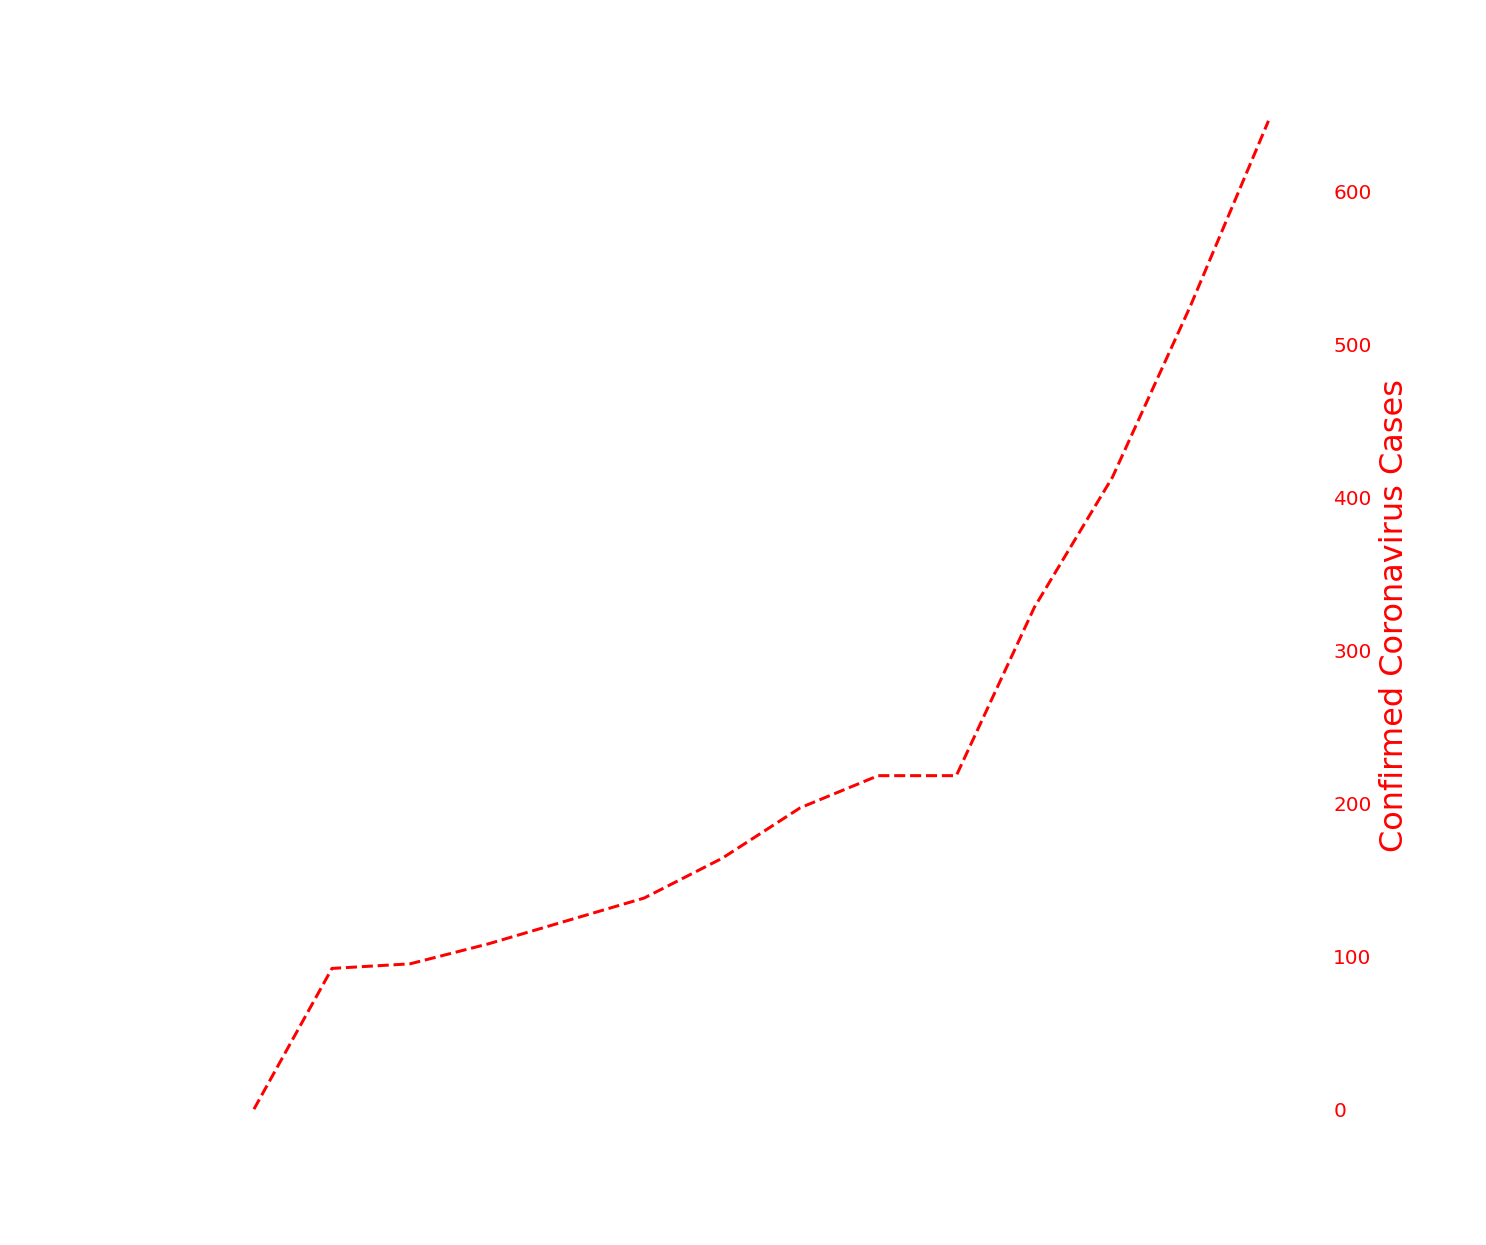

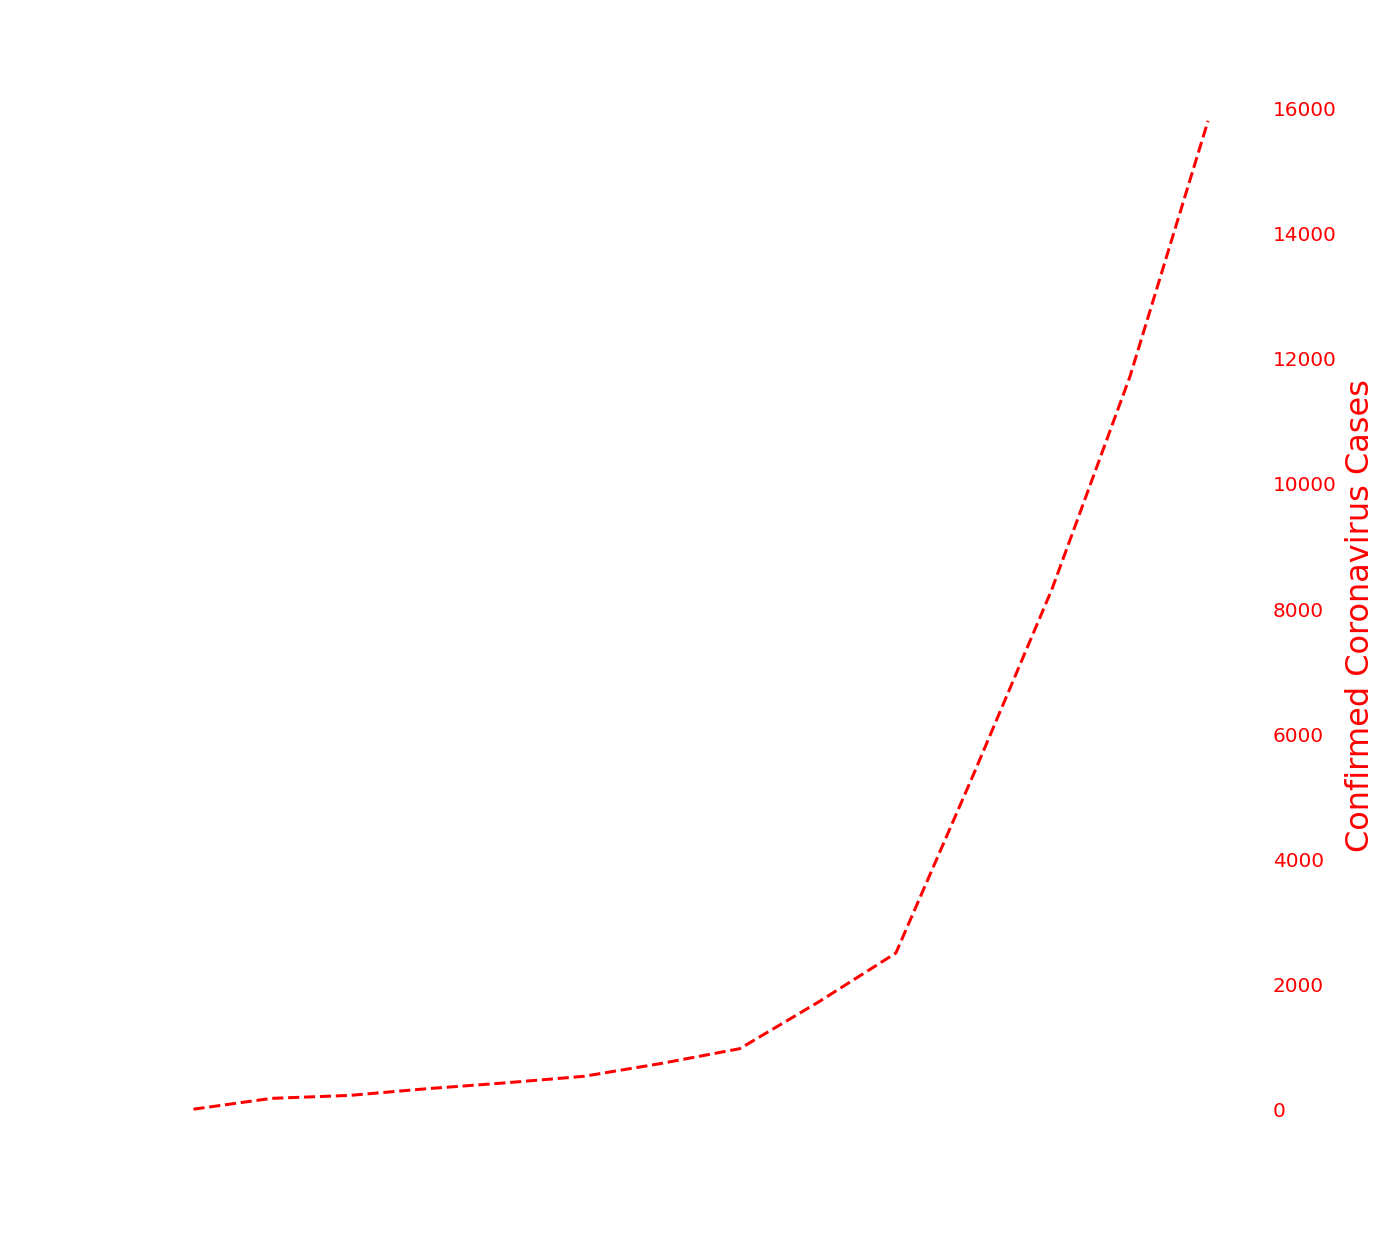

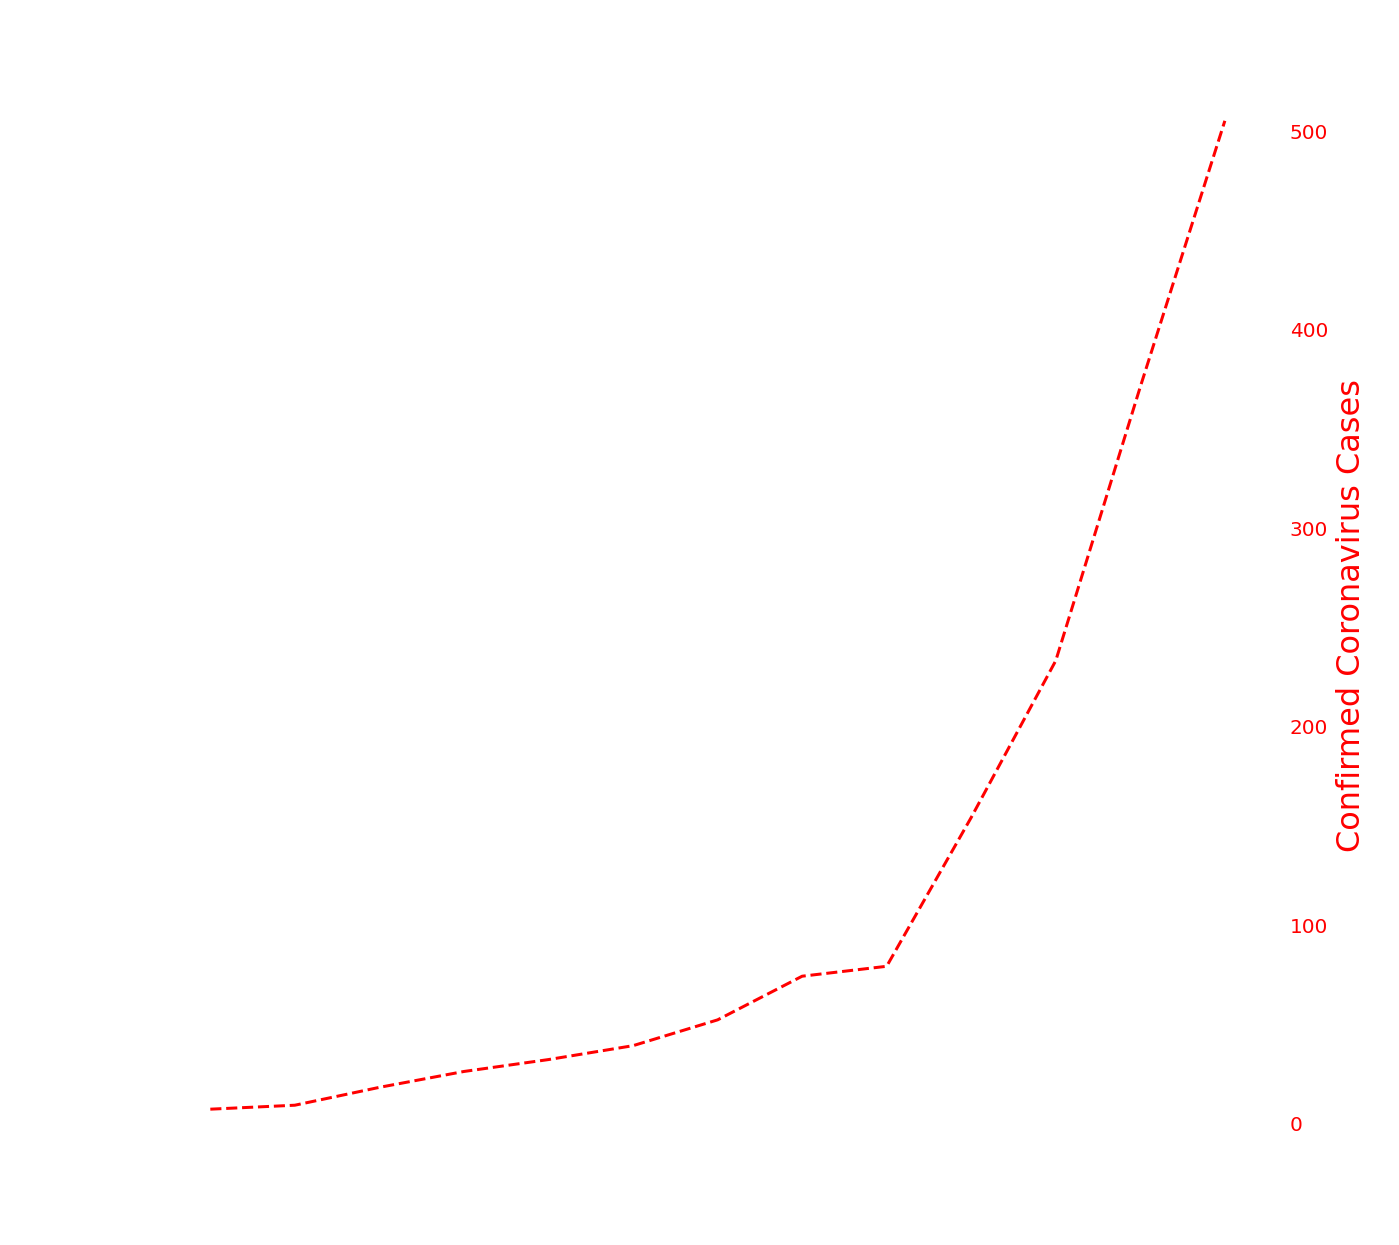

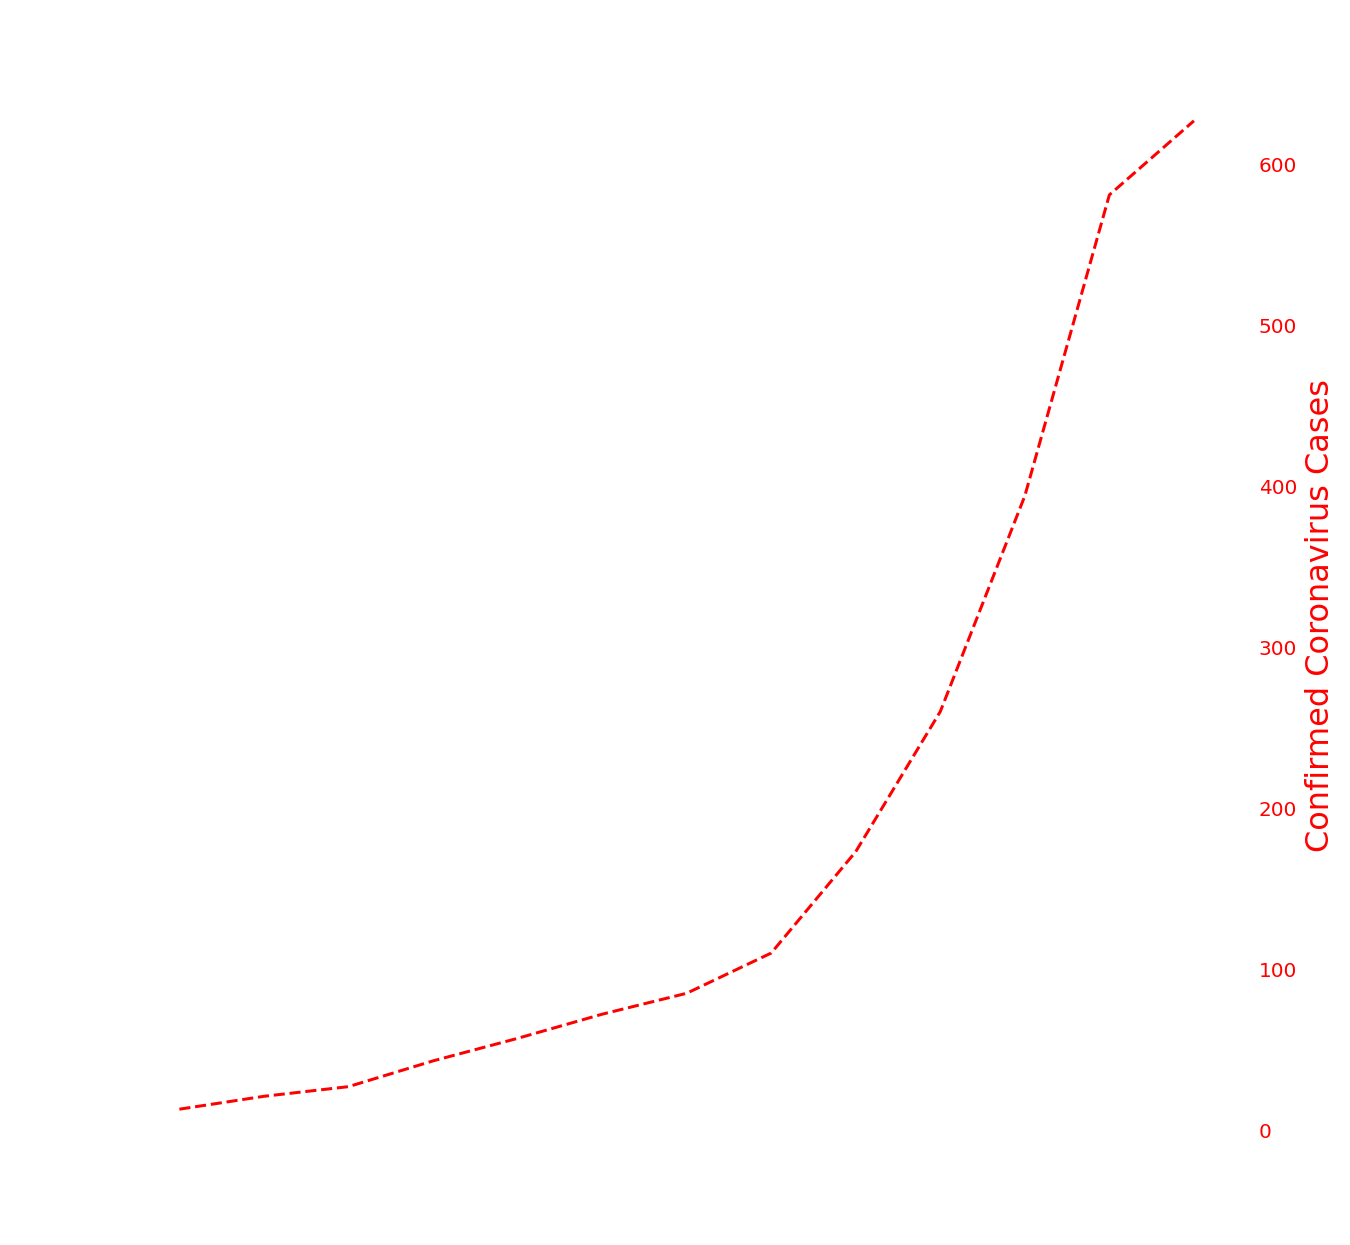

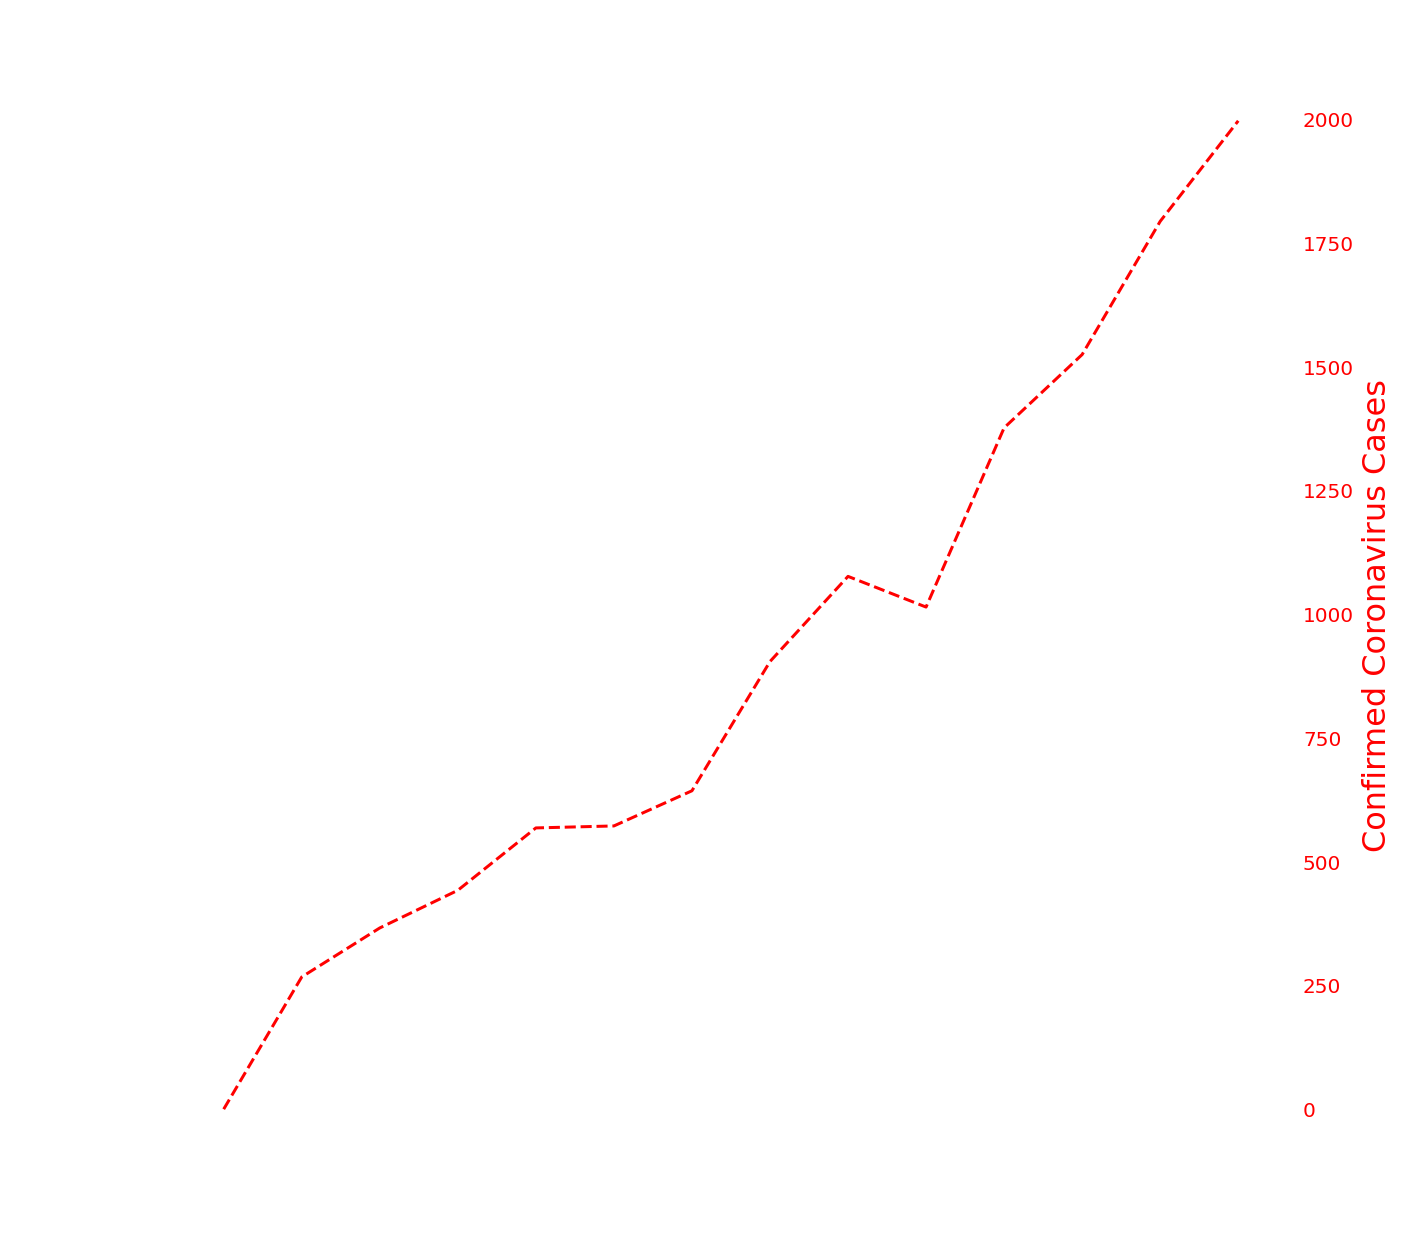

In [222]:
state_list = ['california', 'colorado', 'florida',
              'georgia', 'idaho', 'illinois',
              'louisiana', 'massachusetts', 'newyork',
              'tennessee', 'texas', 'washington']

for state in state_list:
    graphSentimentVsCases(state)

In [25]:
state = 'massachusetts'
state_topics = pickle.load(open(f'tweets/models/{state}/{state}_specific_topics.txt', 'rb'))
state_topics

{'topic0': ['charlie baker',
  'governor charlie',
  'sign petition',
  'shutdownmass minimize',
  'baker shutdownmass',
  'minimize sign',
  'gov charlie',
  'declares emergency',
  'baker declares',
  'emergency due',
  'press conference',
  'whole food',
  'jeff bezos',
  'soon gov',
  'eected soon',
  'food amp',
  'declared emergency',
  'give whole',
  'amp paid',
  'bezos give',
  'bezos bezos',
  'paid sign',
  'national guard',
  'enormous increase',
  'baker declared',
  'watch gov',
  'baker said',
  'demand immediately',
  'functional kit',
  'provided functional'],
 'topic1': ['patrick day',
  'day parade',
  'cancel patrick',
  'parade canceled',
  'amid concern',
  'amid fear',
  'parade cancelled',
  'parade amid',
  'parade postponed',
  'canceled amid',
  'parade due',
  'hartford patrick',
  'canceled due',
  'annual patrick',
  'abundance caution',
  'marty walsh',
  'saint patrick',
  'mayor marty',
  'cancelled due',
  'happy patrick',
  'postponed concern',
  'gr

In [170]:
df = pd.read_csv(f'tweets/tweets_processed/coronavirus_newyork_tweets_processed', engine = 'python')
df = df[df['created_at'] != '0.0'] # if a created_at timestamp is not properly done, twitter has 0.0 filled in
df['date'] = df['created_at'].apply(lambda x: datetime.strptime(x[:10], '%Y-%m-%d'))
dates = df.groupby(['date'])['sentiment'].mean().keys().tolist()
average_sentiment = df.groupby(['date'])['sentiment'].mean().tolist()

In [171]:
average_sentiment

[-0.04450297222859759,
 -0.04095814183345694,
 -0.02877920357044031,
 -0.03117722333397977,
 -0.007810991399678593,
 -0.004284797343557414,
 0.003914754846867187,
 0.005557176752796398,
 0.011168249340904424,
 -0.0014700892974738734,
 0.00018549819308206998,
 0.0012911283607744892,
 -0.002306137865911213,
 0.1252150257953558]

In [180]:
df[df['date'] == '2020-03-22'].iloc[4]['full_text']

"Look at New York State on this map. NY is America's Lombardy. https://t.co/Kq48hlOtW6"